# Task 2: Predict the optimum number of clusters and present it visually

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Imporing Data

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris_data = pd.DataFrame(iris_dataset['data'], columns = iris_dataset['feature_names'])
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
X = iris_data.iloc[:,[0,1,2,3]].values

In [6]:
print('Shape of Data Matrix is {}'.format(X.shape))
iris_data.isnull().sum()

Shape of Data Matrix is (150, 4)


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### Finding the optimum number of clusters 

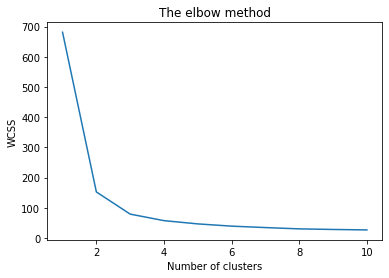

In [7]:
# Finding the optimum number of clusters for k-means classification

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

With the help of "Elbow Method", we can observe that the optimum cluster is where the elbow occurs.

From this we choose the number of clusters as **3**.

### Making Algorithm

Making mathematical iterative algorithm to see the working of K-Means

In [8]:
m = np.size(X,axis=0) #Same as X.shape[0]
c = np.zeros([m,1]) 
J = 0 #Intial value of cost function
k=3 #Number of clusters

centres = np.array([[5.1,3.5,1.4,0.2],[6.2,2.9,4.3,1.3],[6.7,3.1,5.6,2.4]]) #Random initialization of cluster centroids

for itr in range(0,100):
    for i in range(0,m):

        z = np.zeros([k,1])

        for j in range(0,k):
            a = np.square(X[i,:]-centres[j,:])
            b = np.sum(a)
            z[j] = b

        c[i,0] = z.argmin()
    
    q = np.zeros(centres.shape)
    for j in range(0,k):
        p = 0
        for i in range(0,m):
            if c[i,0]==j:
                q[j,:] = q[j,:]+X[i,:]
                p = p+1
                
        centres[j,:] = q[j,:]/p
        
for i in range(0,m):
    J = J + np.sum(np.square(X[i,:]- centres[int(c[1,0]),:]))
        

### Plotting the Graph

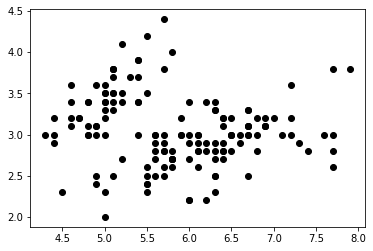

In [9]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.show()

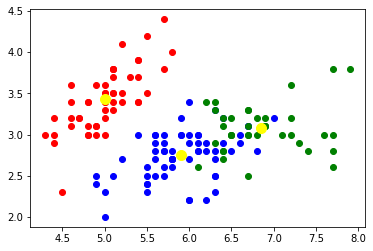

In [10]:
f = c.reshape(m)

# Visualising the clusters - On the first two columns
plt.scatter(X[f == 0, 0], X[f == 0, 1], c = 'red', label = 'Iris-setosa')
plt.scatter(X[f == 1, 0], X[f == 1, 1], c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[f == 2, 0], X[f == 2, 1], c = 'green', label = 'Iris-virginica')

# Plotting the cluster centres of the clusters
plt.scatter(centres[:, 0], centres[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.show()